### Especificação do Problema

O objetivo deste trabalho é obter algumas medidas de objetos presentes em imagens digitais. 

In [1]:
from cv2 import cv2
import matplotlib.pyplot as plt 
import numpy as np

Carregando a imagem...

In [2]:
img = cv2.imread('./images/objetos3.png') 

### Transformação de Cores

Utilizamos a função cvtColor da biblioteca OpenCV para converter a imagem rgb para níveis de cinza. Essa função é utilizada para converter a imagem de um espaço de cores para outro, para o espaço de níveis de cinza indicado por cv2.COLOR_BGR2GRAY. Esse tipo de conversão pondera os canais rgb para formarem apenas uma saída, este processo é feito através da equação para determinar a luminância do rgb:



In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

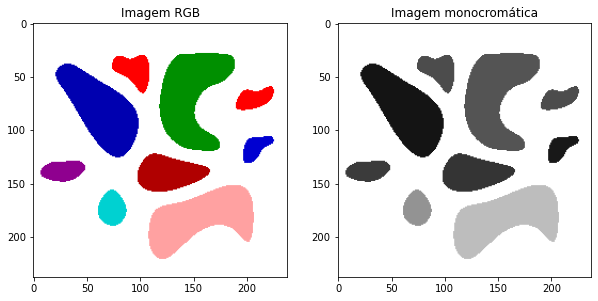

In [4]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Imagem RGB')
plt.subplot(122)
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem monocromática')

plt.show()

### Contorno dos objetos

Para calcular o contorno dos objetos presentes na imagens primeiramente precisamos converter a imagem em tons de cinza para binária usando a função threshold do OpenCV para ficar mais simples de capturar os contornos. Pois, o contorno nada mais é do que a curva que liga todos os pontos contínuos de fronteira de mesma cor ou mesma intensidade.

Após este processo podemos aplicar a função findContours do OpenCV para que encontre os contornos da imagem, para isso ele utiliza alguns argumentos como o RETR_TREE que nada mais é do que o modo de recuperação dos contornos da imagem. Além disso, utiliza o CHAIN_APPROX_SIMPLE que é o modo de aproximação de contorno.



In [5]:
ret, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)
contours, hierarquia = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

Após definir os contornos temos uma lista com cada região detectada, para mostrá-las juntas geramos uma imagem de fundo branco e após isso utilizamos a função drawContours para desenhar todas os contornos no fundo branco, para desenhar todos passamos como parâmetro -1. Para desenhar apenas um dos contornos selecionamos a posição do vetor ao invés de -1.

In [6]:
white_back = np.ones(img.shape)
all_contours = cv2.drawContours(white_back, contours[1:], -1, (0,255,0), 3)

Para plotar a imagem devemos multiplicar por 255, pois quando aplicamos a conversão da imagem para binário a imagem ficou com valores de 0 e 1 não aceitos pela função imshow.

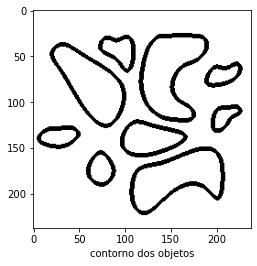

In [7]:
plt.imshow((all_contours * 255).astype(np.uint8))
plt.xlabel("contorno dos objetos")
plt.show()

### Extração da propriedade dos objetos 

Para extrair as propriedades de centróide, perímetro e área devemos separar cada contorno. Para encontrarmos o centróide precisamos calcular o momento da imagem, que nada mais é do que uma média ponderada entre as intensidades dos pixels da imagem. Podemos calcular através da função moments da biblioteca OpenCV. 

Para calcular o centróide utilizamos uma relação entre os momentos da imagem:
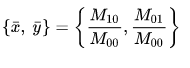

Por outro lado, para calcularmos a área utilizamos a função contourArea. De mesmo modo, para calcular o perímetro utilizamos a função arcLength. Ambas funções da biblioteca OpenCV.

In [8]:
aux = 0
areas = []
for contour in contours[1:]:
    
    M = cv2.moments(contour) #calculo do momento
    
    cX = int(M["m10"] / M["m00"]) #calculo da coordenada x central
    cY = int(M["m01"] / M["m00"]) #calculo da coordenada y central
    area = cv2.contourArea(contour) #calculo da área de contorno
    perimeter = cv2.arcLength(contour,True) #calculo do perímetro
    
    
    hull = cv2.convexHull(contour)
    hull_area = cv2.contourArea(hull)
    solidity = float(area)/hull_area
    areas.append(area)
    
    
    (x, y), (Ma,ma), angle = cv2.fitEllipse(contour)
    a = ma/2
    b = Ma/2
    excentricity = np.sqrt(a**2 - b**2)/a

    print('região {}:  centróide: {}  perímetro: {:,.6f} área: {:,.0f} excentricidade: {:,.6f} solidez: {:,.6f} '.format(aux, (cX, cY), perimeter, area, excentricity, solidity))
    
#     Descomentar se gostar das figuras + borda realçada 
#     img = cv2.drawContours(img, contours[1:], -1, (0,255,0), 3)
    img= cv2.putText(img, str(aux), (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 0.25, (0, 0, 0), 1) #adicionando labels ao centro de cada imagem, com tamanho de 0,25, fonte: FONT_HERSHEY_SIMPLEX e 1 px de largura.
    
    aux +=1

região 0:  centróide: (73, 173)  perímetro: 101.982755 área: 716 excentricidade: 0.625314 solidez: 0.980164 
região 1:  centróide: (156, 182)  perímetro: 311.078208 área: 4,067 excentricidade: 0.881921 solidez: 0.780689 
região 2:  centróide: (27, 137)  perímetro: 108.669047 área: 688 excentricidade: 0.877953 solidez: 0.972458 
região 3:  centróide: (126, 140)  perímetro: 179.781745 área: 1,762 excentricidade: 0.875949 solidez: 0.971862 
região 4:  centróide: (208, 116)  perímetro: 94.426406 área: 478 excentricidade: 0.883524 solidez: 0.925460 
região 5:  centróide: (206, 70)  perímetro: 104.911687 área: 584 excentricidade: 0.871986 solidez: 0.913928 
região 6:  centróide: (62, 80)  perímetro: 265.119838 área: 3,690 excentricidade: 0.907458 solidez: 0.978264 
região 7:  centróide: (94, 43)  perímetro: 125.639609 área: 844 excentricidade: 0.750543 solidez: 0.904558 
região 8:  centróide: (147, 68)  perímetro: 319.421354 área: 4,107 excentricidade: 0.738345 solidez: 0.754963 


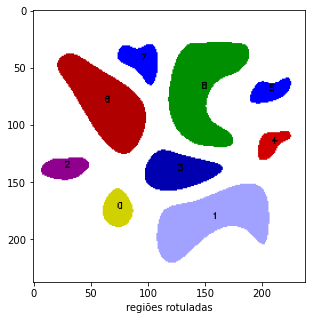

In [9]:
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.xlabel('regiões rotuladas')
plt.show()

# Croppando as imagens pelo contorno e calculando a excentricidade

In [10]:
import pandas as pd
import itertools

In [11]:
CroppedImageList = []
for contour in contours[1:]:
    x, y, w, h = cv2.boundingRect(contour)
    CroppedImageList.append(thresh[y : y + h, x:x + w])

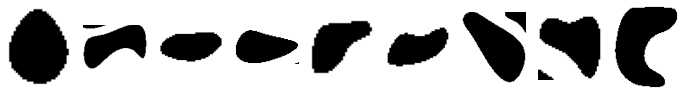

In [12]:
f = plt.figure(figsize = (12, 3))
for i in range(len(CroppedImageList)):
    f.add_subplot(1, len(CroppedImageList), i+1)
    plt.imshow(CroppedImageList[i], cmap='gray', vmin=0, vmax=255)
    plt.axis("off")
plt.show()

In [13]:
def CountPixels(imagerow):
    df = pd.DataFrame([[x, len(list(y))] for x, y in itertools.groupby(imagerow)], columns = ['Cor', 'Quantidade'])
    df = df[df['Cor'] == 0]
    df = df[df['Quantidade'] == df['Quantidade'].max()].reset_index(drop = True)
    try:
        return df['Quantidade'][0]
    except:
        return 0

In [14]:
AllData = []
for i in range(len(CroppedImageList)):
    testImage = CroppedImageList[i]
    
    RowSizes = []
    for j in range(testImage.shape[0]):
        rowimage = testImage[j, :]
        RowSizes.append(CountPixels(rowimage))
    ColSizes = []
    for j in range(testImage.shape[1]):
        colimage = testImage[:, j]
        ColSizes.append(CountPixels(colimage))
        
    AuxDict = {'Imagem':i, 'Row':max(RowSizes), 'Col':max(ColSizes)}
    AuxDict['A'] = max(AuxDict['Row'], AuxDict['Col'])
    AuxDict['B'] = min(AuxDict['Row'], AuxDict['Col'])
    AuxDict['Excentricidade'] = AuxDict['B']/AuxDict['A']
    AllData.append(AuxDict)
    
AllData = pd.DataFrame.from_dict(AllData)
display(AllData)

Imagem  Row  Col   A   B  Excentricidade
0       0   27   34  34  27        0.794118
1       1   97   50  97  50        0.515464
2       2   41   19  41  19        0.463415
3       3   68   36  68  36        0.529412
4       4   26   23  26  23        0.884615
5       5   32   19  32  19        0.593750
6       6   56   64  64  56        0.875000
7       7   35   36  36  35        0.972222
8       8   63   90  90  63        0.700000

### Histograma da área dos objetos

In [15]:
areas = np.array(areas)
print("número de regiões pequenas: {} \nnúmero de regiões médias: {} \nnúmero de regiões grandes: {}".format(len(areas[areas < 1500]), len(areas[(areas < 3000) & (areas >= 1500)]), len(areas[areas >= 3000])))

número de regiões pequenas: 5 
número de regiões médias: 1 
número de regiões grandes: 3


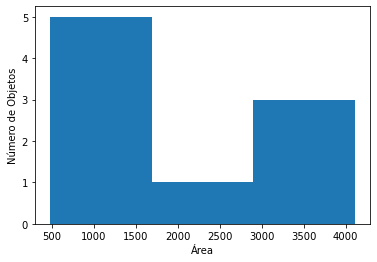

In [16]:
plt.hist(areas, bins=3)
plt.xlabel("Área")
plt.ylabel("Número de Objetos")
plt.show()

### Testes Realizados

### Limitações